# Código de Prueba
Objetivo: exploración de datos y aprendizaje del uso de GitHub integrado con Jupyter-labs

In [16]:
# librerías necesarias
# data.table contiene fread()
require("data.table")

In [17]:
# Summary statistics https://docs.ropensci.org/skimr/
library(skimr)

In [18]:
# Grafico de matriz de correlacion https://cran.r-project.org/web/packages/ggcorrplot/readme/README.html
require(ggcorrplot)

In [19]:
#cargo los datos
dataset  <- fread("C:\\Users\\COLMO\\data_mining\\datasetsOri\\paquete_premium_202011.csv")

In [20]:
# Clase de dataset
class(dataset)

[1] "data.table" "data.frame"

In [21]:
# Cantidad de columnas
ncol(dataset)

[1] 159

In [22]:
# Cantidad de registros
nrow(dataset)

[1] 238608

In [12]:
# Summary es imposible de abarcar
#summary(dataset)

In [14]:
#skim(data = dataset)

[R for Data Science](https://r4ds.had.co.nz/exploratory-data-analysis.html)
* What type of variation occurs within my variables?
> * Varibale Distribution
> * Tipical Values
>> * Which values are the most common? Why?
>> * Which values are rare? Why? Does that match your expectations?
>> * Can you see any unusual patterns? What might explain them?
>> * Clusters:
>>> * How are the observations within each cluster similar to each other?
>>> * How are the observations in separate clusters different from each other?
>>> * How can you explain or describe the clusters?
>>> * Why might the appearance of clusters be misleading?
* What type of covariation occurs between my variables?<br>
__‘Understanding the dataset’ = Cleansing + Understanding__
* Extracting important variables and leaving behind useless variables
* Identifying outliers, missing values, or human error
* Understanding the relationship(s), or lack of, between variables
* Ultimately, maximizing your insights of a dataset and minimizing potential error that may occur later in the process

In [ ]:
# Visualization and Imputation of Missing Values https://cran.r-project.org/web/packages/VIM/vignettes/VIM.html
library(VIM)

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: 'VIM'


The following object is masked from 'package:datasets':

    sleep


Warning message in plot.aggr(res, ...):
"not enough vertical space to display frequencies (too many combinations)"



 Variables sorted by number of missings: 
                             Variable  Count
                   Master_Finiciomora 237642
                     Visa_Finiciomora 232362
                Master_mconsumospesos 145128
              Master_mconsumosdolares 145128
                Master_madelantopesos 145128
              Master_madelantodolares 145128
                   Master_mpagospesos 145128
                 Master_mpagosdolares 145128
                 Master_mconsumototal 145128
                     Master_cconsumos 145128
            Master_cadelantosefectivo 145128
                  Visa_mconsumospesos  33272
                Visa_mconsumosdolares  33272
                  Visa_madelantopesos  33272
                Visa_madelantodolares  33272
                     Visa_mpagospesos  33272
                   Visa_mpagosdolares  33272
                   Visa_mconsumototal  33272
                       Visa_cconsumos  33272
              Visa_cadelantosefectivo  33272
            

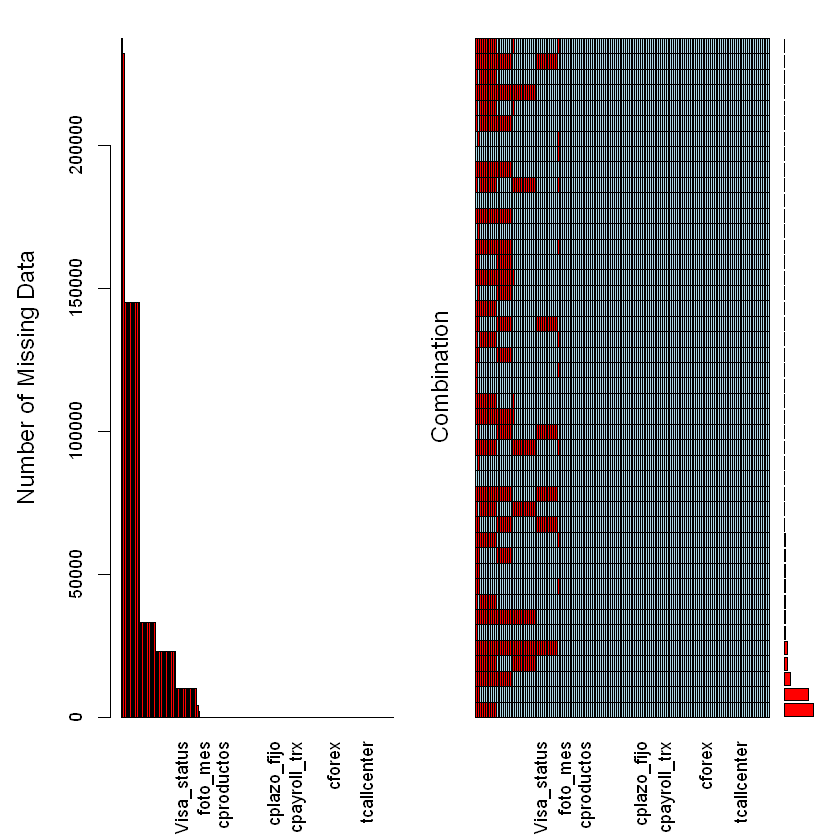

In [23]:
# Missing Values
# Gráfico para analizar la distribución de datos faltantes en la muestra
# The barplot on the left hand side shows the amount of missing/imputed values in each variable.

MP_plot_egdata <- aggr(dataset, col=c('Lightblue','Red'),
                       numbers=TRUE, prop = FALSE, sortVars=TRUE,
                       labels=names(dataset), cex.axis=.9,
                       gap=3, ylab=c("Number of Missing Data", "Combination"))

In [27]:
names(MP_plot_egdata)

[1] "x"            "combinations" "count"        "percent"      "missings"    
[6] "tabcomb"      "imputed"

In [51]:
MP_plot_egdata$missings[MP_plot_egdata$missings$Count>0, ]

,Variable,Count
,<chr>,<int>
mtarjeta_visa_descuentos,mtarjeta_visa_descuentos,4320
mtarjeta_master_descuentos,mtarjeta_master_descuentos,2251
Master_delinquency,Master_delinquency,22985
Master_status,Master_status,22985
Master_mfinanciacion_limite,Master_mfinanciacion_limite,22985
Master_Fvencimiento,Master_Fvencimiento,22985
Master_Finiciomora,Master_Finiciomora,237642
Master_msaldototal,Master_msaldototal,22985
Master_msaldopesos,Master_msaldopesos,22985


In [60]:
df.plot = MP_plot_egdata$missings[MP_plot_egdata$missings$Count>0, ]

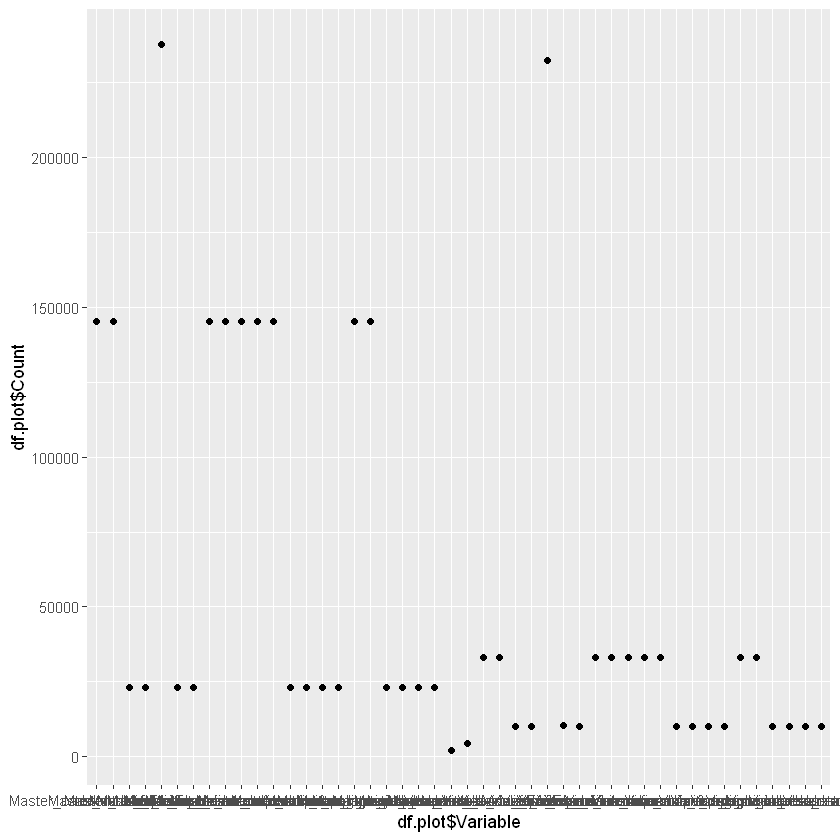

In [64]:
qplot(df.plot$Variable, df.plot$Count)
#plot(Count~Variable, data = df.plot)

In [75]:
# Clasificación
df.plot$na.strato = ifelse(df.plot$Count > 200000, 'HIGH', 
                           ifelse(df.plot$Count > 100000, 'MEDIUM', 
                                  ifelse(df.plot$Count > 25000, 'LOW', 'LOWLOW')))

In [76]:
df.plot

,Variable,Count,na.strato
,<chr>,<int>,<chr>
mtarjeta_visa_descuentos,mtarjeta_visa_descuentos,4320,LOWLOW
mtarjeta_master_descuentos,mtarjeta_master_descuentos,2251,LOWLOW
Master_delinquency,Master_delinquency,22985,LOWLOW
Master_status,Master_status,22985,LOWLOW
Master_mfinanciacion_limite,Master_mfinanciacion_limite,22985,LOWLOW
Master_Fvencimiento,Master_Fvencimiento,22985,LOWLOW
Master_Finiciomora,Master_Finiciomora,237642,HIGH
Master_msaldototal,Master_msaldototal,22985,LOWLOW
Master_msaldopesos,Master_msaldopesos,22985,LOWLOW
